# Neural Network

## What is a neural network?

A neural network is a method in artificial intelligence that teaches computers to process data in a way that is inspired by the human brain. It is a type of machine learning process, called deep learning, that uses interconnected nodes or neurons in a layered structure that resembles the human brain.

Artificial neural networks (ANNs) are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.

<b>Input layer</b> represents dimensions of the input vector.<br>
<b>Hidden layer</b> represents the intermediary nodes that divide the input space into regions with (soft) boundaries. It takes in a set of weighted input and produces output through an activation function.<br>
<b>Output layer</b> represents the output of the neural network.

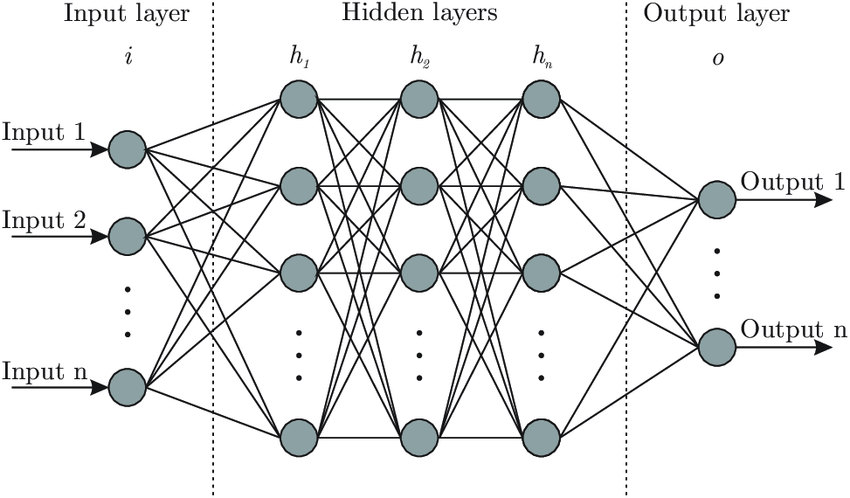

## How do neural networks work?

Think of each individual node as its own linear regression model, composed of input data, weights, a bias (or threshold), and an output. The formula would look something like this:

∑wixi + bias = w1x1 + w2x2 + w3x3 + bias

Once an input layer is determined, weights are assigned.These weights help determine the importance of any given variable, with larger ones contributing more significantly to the output compared to other inputs. All inputs are then multiplied by their respective weights and then summed. Afterward, the output is passed through an activation function, which determines the output. If that output exceeds a given threshold, it “fires” (or activates) the node, passing data to the next layer in the network. This results in the output of one node becoming in the input of the next node. This process of passing data from one layer to the next layer defines this neural network as a feedforward network.

## Types of neural networks

The nine types of neural networks are:
<ul type=*>
<li>Perceptron<br>
<li>Feed Forward Neural Network<br>
<li>Multilayer Perceptron<br>
<li>Convolutional Neural Network<br>
<li>Radial Basis Functional Neural Network<br>
<li>Recurrent Neural Network<br>
<li>LSTM – Long Short-Term Memory<br>
<li>Sequence to Sequence Models<br>
<li>Modular Neural Network</li>
</ul>

## Neural networks vs. deep learning
Deep Learning and neural networks tend to be used interchangeably in conversation, which can be confusing. As a result, it’s worth noting that the “deep” in deep learning is just referring to the depth of layers in a neural network. A neural network that consists of more than three layers—which would be inclusive of the inputs and the output—can be considered a deep learning algorithm. A neural network that only has two or three layers is just a basic neural network.

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5000)

In [137]:
import numpy as np
class neural_network:
    def __init__(self):
        self.w1 = 1 
        self.w2 = 1
        self.bias = 0
        
    def log_loss(self, y_true, y_predicted):
        epsilon = 1e-15
        y_predicted_new = [max(i,epsilon) for i in y_predicted]
        y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
        y_predicted_new = np.array(y_predicted_new)
        return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))
        
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def gradient_descent(self, x1, x2, y_true, alpha = 0.5, epochs = 1000):
        bias = 0
        w1 = w2 = 1
        for i in range(epochs):
            y_hat = w1*x1 + w2*x2 + bias
            # uncomment the line below if you use activation function on output layer. 
            y_hat = self.sigmoid(y_hat) # don't forget to define activation function
            error = self.log_loss(y_true,y_hat)

            n = len(x1)
            df_dw1 = (1/n)*np.dot(np.transpose(x1),(y_hat-y_true))
            df_dw2 = (1/n)*np.dot(np.transpose(x2),(y_hat-y_true))
            df_db = np.mean((y_hat-y_true))

            w1 = w1 - (alpha * df_dw1)
            w2 = w2 - (alpha * df_dw2)
            bias = bias - (alpha * df_db)
            
            if i%100==0:
                print('W1:',w1,'W2:',w2,'b',bias,'Loss:',error)
        print('W1:',w1,'W2:',w2,'b',bias,'Loss:',error)
        cofficients = (w1,w2,bias)
        return cofficients

    def thresold_prediction(self,x1,x2):
        w1, w2, bias = self.cofficients
        prediction = (w1*x1) + (w2*x2) + bias
        return prediction
    
    def predict(self, x1, x2):
        prediction = self.thresold_prediction(x1, x2)
        return [1 if i > 0.5 else 0 for i in prediction]

    
    def fit(self, x1, x2, y_true, alpha = 0.5, epochs = 1000):
        self.cofficients = self.gradient_descent(x1, x2, y_true, alpha, epochs)
        self.w1,self.w2,self.bias = self.cofficients
        print(f"Final weights and bias: w1: {self.w1}, w2: {self.w2}, bias: {self.bias}")

In [138]:
import pandas as pd
df = pd.read_csv('insurance_data.csv')

In [139]:
df['age'] = df['age']/100

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)

In [141]:
my_model= neural_network()
#neural_network.fit(x1=X_train['age'], x2=X_train['affordibility'], y_true= y_train, alpha=0.5, epochs=7000)

In [142]:
my_model.fit(x1=X_train['age'], x2=X_train['affordibility'], y_true= y_train, alpha=0.5, epochs=7000)

W1: 0.974907633470177 W2: 0.948348125394529 b -0.11341867736368583 Loss: 0.7113403233723417
W1: 2.2007131317600317 W2: 1.2941584023238906 b -1.6607009122062801 Loss: 0.5390680417774752
W1: 3.443016970881803 W2: 1.4042218624465033 b -2.2571369883752723 Loss: 0.5005011269691375
W1: 4.472179522095915 W2: 1.438787986553552 b -2.707387811922373 Loss: 0.4750814640632793
W1: 5.3225621674147305 W2: 1.4664810071905663 b -3.0787595797907787 Loss: 0.4577474350773423
W1: 6.031314968844422 W2: 1.4954938706406726 b -3.39313314590453 Loss: 0.4456454060995865
W1: 6.62812981441833 W2: 1.5252634355026609 b -3.662340616030081 Loss: 0.43701399395304763
W1: 7.135549285979656 W2: 1.5545746584644065 b -3.894676465689681 Loss: 0.43074059288359234
W1: 7.570652134140106 W2: 1.582620935100352 b -4.096476695372909 Loss: 0.42610547872487836
W1: 7.946515760566514 W2: 1.6089757022142486 b -4.272725767814955 Loss: 0.4226317759984031
W1: 8.273292028057181 W2: 1.633458196575418 b -4.427404727306034 Loss: 0.419996277495

In [143]:
my_model.thresold_prediction(X_test['age'], X_test['affordibility'])

2     1.289386
10   -1.895259
21   -2.904422
11   -0.797106
14    1.509017
9     2.826801
dtype: float64

In [144]:
my_model.predict(X_test['age'], X_test['affordibility'])

[1, 0, 0, 0, 1, 1]